# Nuages de mots

## Imports et stopwords

In [22]:
import os
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import pandas as pd

In [24]:
# Téléchargement des ressources NLTK si nécessaire
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/ilaria/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ilaria/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# stopwords français
sw = set(stopwords.words('french'))

In [39]:
# Stopwords OCR + bruit journalistique
sw |= {
    "bruxelles", "brux", "rue", "tél", "tel", "adresse",
    "soir", "matin", "jour", "hier", "demain",
    "prix", "vente", "achat", "maison",
    "samedi", "dimanche", "lundi", "mardi",
    "mercredi", "jeudi", "vendredi",
    "rossel", "belga", "afp",
    "hmu", "xix", "xii", "xxe", "xxx"
}

# Stopwords hors-thématique (évite les nuages inutiles)
sw |= {
    "film", "théâtre", "cinéma", "concert",
    "halloween", "costume",
    "ville", "place", "travail"
}


In [32]:
def nettoyer_texte(text):
    text = re.sub(r'[^\w\s\-àâäéèêëîïôöùûüç]', ' ', text)
    text = text.lower()
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'\b\w{1,2}\b', ' ', text)     # Supprime les mots très courts
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [35]:
#charger les données 
data_path = "../../data/txt_tp4"
files = [f for f in os.listdir(data_path) if f.endswith(".txt")]
print("Nombre de fichiers thématiques =", len(files))


Nombre de fichiers thématiques = 999


### Créer un texte global pour générer le nuage

In [ ]:
import re

corpus = []
corpus_decennies = {}

for f in files:
    year = int(f.split("_")[2].split("-")[0])
    dec = (year // 10) * 10  # 1954 → 1950
    
    with open(os.path.join(data_path, f), "r", encoding="utf-8") as ff:
        text = nettoyer_texte(ff.read())
    
    words = [w for w in text.split() if w not in sw]
    
    corpus.extend(words)
    
    corpus_decennies.setdefault(dec, [])
    corpus_decennies[dec].append(" ".join(words))

# Aperçu
list(corpus_decennies.keys())

IndexError: list index out of range

### Construire les fréquences et le nuage de mots thématique

In [37]:
frequencies = Counter(corpus)

# Vérif : afficher les 30 mots les plus fréquents
frequencies.most_common(30)


[('musique', 7773),
 ('ena', 6124),
 ('grand', 4883),
 ('programme', 4725),
 ('heures', 4626),
 ('très', 4258),
 ('france', 3562),
 ('monde', 3355),
 ('cours', 3185),
 ('paris', 3101),
 ('homme', 3088),
 ('belgique', 3069),
 ('orchestre', 3053),
 ('temps', 3051),
 ('etc', 3037),
 ('jean', 3035),
 ('peu', 3013),
 ('enf', 2958),
 ('theatre', 2942),
 ('enfants', 2924),
 ('concert', 2907),
 ('vie', 2881),
 ('premier', 2751),
 ('grande', 2633),
 ('première', 2614),
 ('pays', 2595),
 ('femme', 2583),
 ('mois', 2578),
 ('part', 2459),
 ('libre', 2438)]

### Générer et afficher le nuage

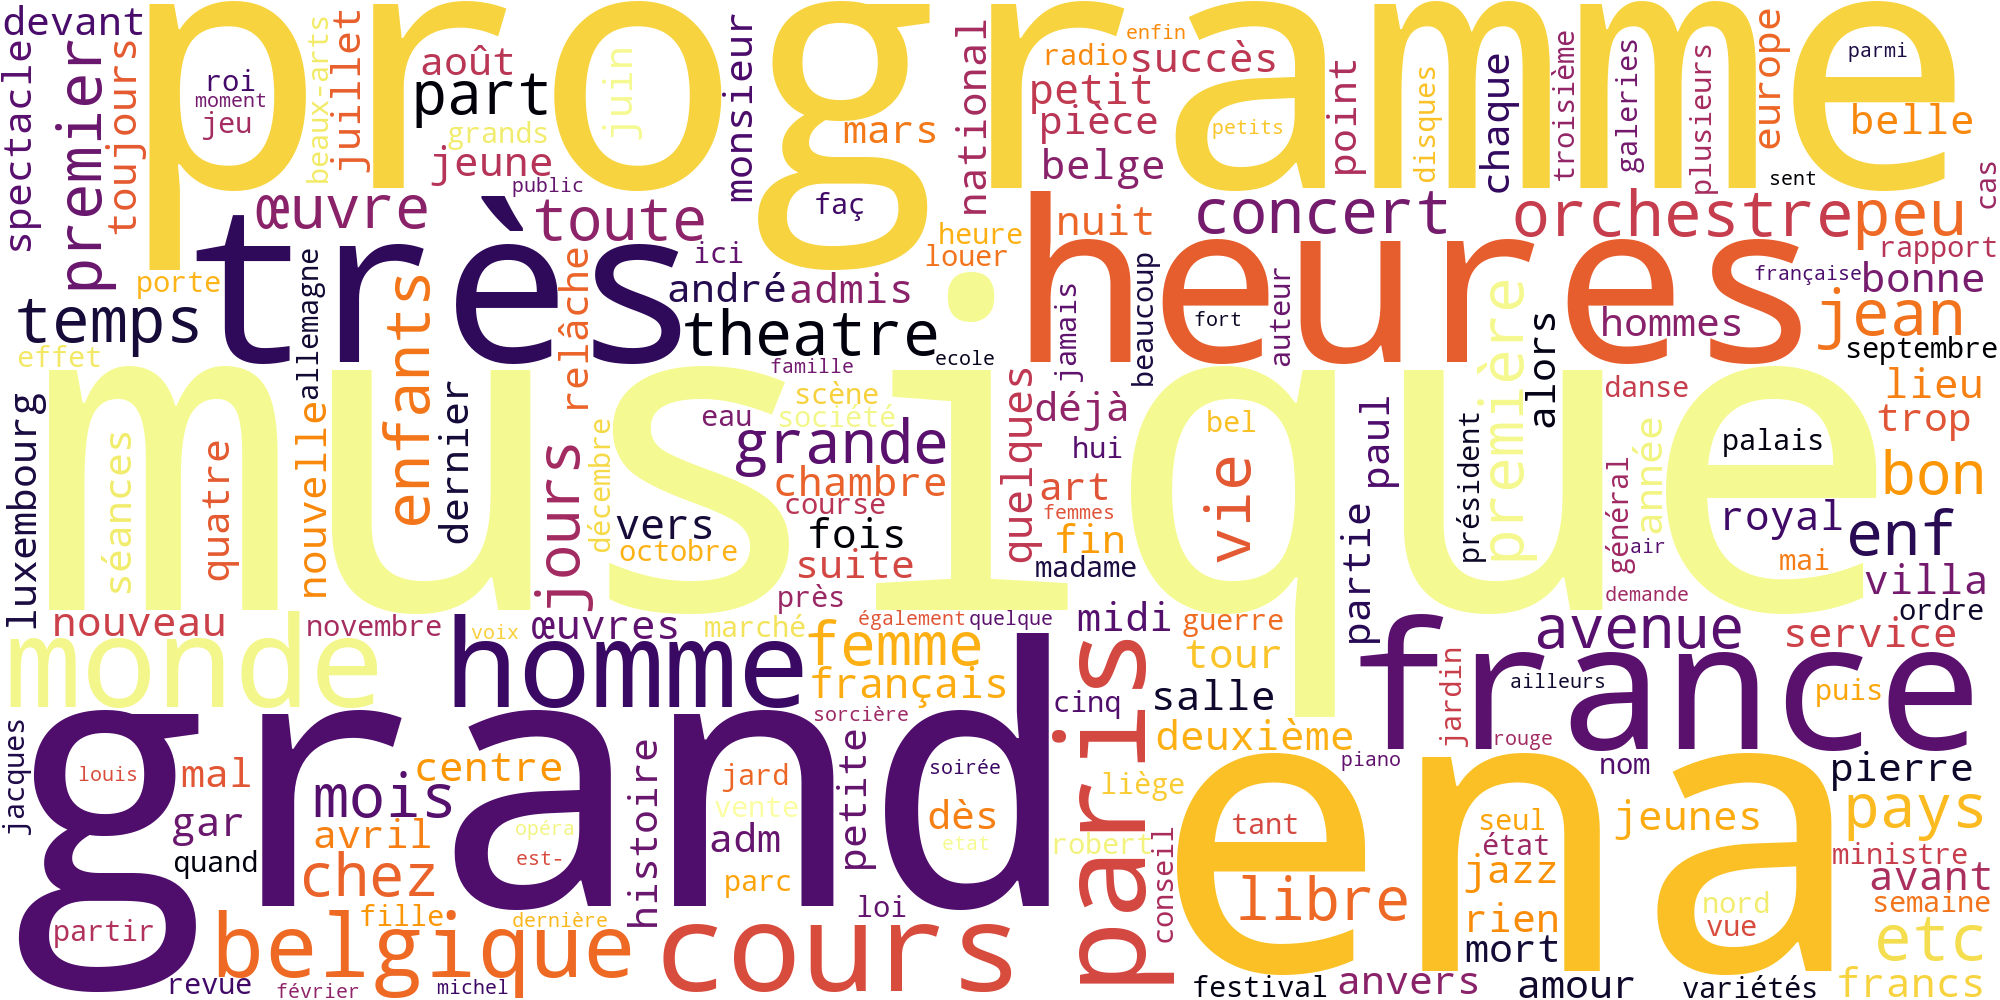

In [38]:
cloud = WordCloud(
    width=2000, height=1000,
    background_color='white',
    colormap='inferno'
).generate_from_frequencies(frequencies)

cloud.to_file("nuage_sorcieres.png")

from IPython.display import Image
Image("nuage_sorcieres.png")
